In [54]:
import pandas as pd
import numpy as np
import konlpy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [55]:
# 주요 라이브러리 import

import warnings

warnings.filterwarnings(action='ignore')

import time

from IPython.display import Image

import pandas as pd

import numpy as np

 

import matplotlib.pyplot as plt

import seaborn as sns

 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.metrics import *

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 

from sklearn import datasets

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge, Lasso, ElasticNet

 

from matplotlib import rc, font_manager

import matplotlib.font_manager as fm

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl

import matplotlib.pyplot as plt

import matplotlib.font_manager as fm # 폰트 관련 용도

%config InlineBackend.figure_format = 'retina'

 

# 디렉토리 및 파일 이름에 맞추어 변경

#font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.

# font_location = './NanumGothic.ttf'

# font_name = fm.FontProperties(fname=font_location).get_name()

# rc('font', family=font_name)

In [56]:
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk 

In [57]:
# 1. df<-read a csv file
# 2. extraction!(reg) => not null, word
# 3. classification => train/test data
# 4. stopwords
# 5. vectorize => choice(Counter,Tf-idf):fit()->transform()
# 6. ml model fit(train) => predict(test) => accuracy check
# 7. one mail=> predict

## 1. df<-read a csv file

In [58]:

df = pd.read_csv('spam.csv', encoding='cp1252')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## 2. extraction!(reg) => not null, word

In [59]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [61]:
lemma = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))


In [62]:
words = []

In [63]:
for v2 in df['v2']:
    ## 1. 전처리 1번: 글자가 아닌 것은 공백으로 대체
    pre1 = re.sub(r"[^a-zA-Z]+", " ", str(v2))
    # print(pre1)
    ## 2. 소문자로 변경하여 단어를 토큰으로 마들자.
    pre1_lower_token = word_tokenize(pre1.lower())
    # print(pre1_lower_token)
    
    ## 3. 전처리 2번: 불용어 처리
    pre2 = [w for w in pre1_lower_token if w not in stopwords]
    # print(pre2)
    
    ## 4. 표제어 추출
    pre3 = [lemma.lemmatize(w) for w in pre2]
    # print(pre3)
    words.append(pre3)
words[:2]

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni']]

In [64]:
words2 = reduce(lambda x, y: x + y, words)
words2

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',

In [65]:
count = Counter(words2)
count.most_common(5)

[('u', 1279), ('call', 639), ('get', 408), ('ur', 385), ('gt', 318)]

In [66]:
word_count = dict()
for word, counts in count.most_common(50):
    if counts > 10 and len(word)!=1: #30개 이상이고 한글자 아닌것 추출
        word_count[word] = counts #'data' : 1654
print(word_count)

{'call': 639, 'get': 408, 'ur': 385, 'gt': 318, 'lt': 316, 'go': 313, 'ok': 292, 'day': 291, 'free': 288, 'know': 271, 'got': 252, 'come': 251, 'like': 248, 'time': 247, 'good': 246, 'text': 223, 'love': 217, 'want': 216, 'send': 199, 'txt': 184, 'need': 184, 'one': 184, 'today': 181, 'going': 173, 'home': 167, 'stop': 166, 'lor': 162, 'sorry': 160, 'see': 158, 'still': 157, 'mobile': 157, 'take': 155, 'back': 153, 'da': 152, 'reply': 150, 'think': 146, 'dont': 144, 'tell': 144, 'week': 141, 'phone': 140, 'hi': 138, 'new': 136, 'later': 135, 'pls': 134}


In [67]:
sorted_wc = sorted(word_count.values(), reverse=True)
sorted_wc

[639,
 408,
 385,
 318,
 316,
 313,
 292,
 291,
 288,
 271,
 252,
 251,
 248,
 247,
 246,
 223,
 217,
 216,
 199,
 184,
 184,
 184,
 181,
 173,
 167,
 166,
 162,
 160,
 158,
 157,
 157,
 155,
 153,
 152,
 150,
 146,
 144,
 144,
 141,
 140,
 138,
 136,
 135,
 134]

<function matplotlib.pyplot.show(close=None, block=None)>

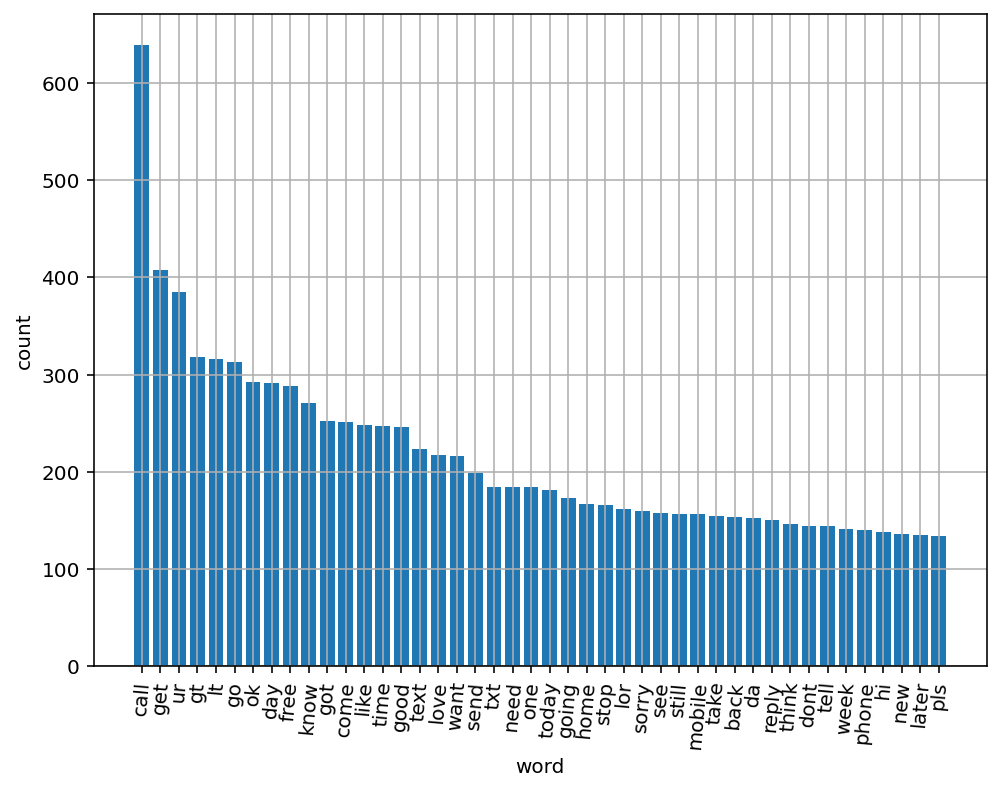

In [68]:
plt.figure(figsize=(8,6))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation='85')
plt.show

## 3. classification => test/test data

In [93]:
# 1. df<-read a csv file
# 2. extraction!(reg) => not null, word
# 3. classification => train/test data
# 4. stopwords
# 5. vectorize => choice(Counter,Tf-idf):fit()->transform()
# 6. ml model fit(train) => predict(test) => accuracy check
# 7. one mail=> predict

In [160]:
df['v2'] = df['v2'].apply(lambda x: re.sub(r'[^[a-zA-Z]*$', "", x))

In [161]:
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,Go until jurong point crazy Available only in ...,NaN,NaN,NaN
1,ham,Ok lar Joking wif u oni,NaN,NaN,NaN
2,spam,Free entry in a wkly comp to win FA Cup final ...,NaN,NaN,NaN
3,ham,U dun say so early hor U c already then say,NaN,NaN,NaN
4,ham,Nah I don t think he goes to usf he lives arou...,NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it s been week s now...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me T...,NaN,NaN,NaN
7,ham,As per your request Melle Melle Oru Minnaminun...,NaN,NaN,NaN
8,spam,WINNER As a valued network customer you have b...,NaN,NaN,NaN
9,spam,Had your mobile months or more U R entitled to...,NaN,NaN,NaN


In [162]:
df = df.astype({"v1": 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   v1          5572 non-null   category
 1   v2          5572 non-null   object  
 2   Unnamed: 2  50 non-null     object  
 3   Unnamed: 3  12 non-null     object  
 4   Unnamed: 4  6 non-null      object  
dtypes: category(1), object(4)
memory usage: 179.8+ KB


In [184]:
X_train, X_test, y_train, y_test = train_test_split(df['v2'],
                                                    df['v1'], 
                                                    test_size=0.2, 
                                                    stratify=df['v1'],
                                                    random_state=42)

In [185]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


## 5. vectorize => choice(Counter,Tf-idf):fit()->transform()


In [186]:
cv = CountVectorizer()
tfidfv = TfidfVectorizer(min_df=5,
                        lowercase=True,
                        stop_words='english')

In [187]:
train_tfidf_df = tfidfv.fit_transform(X_train)
train_cv_df = cv.fit_transform(X_train)

In [188]:
test_tfidf_df = tfidfv.transform(X_test)
test_cv_df = cv.transform(X_test)

In [189]:
test_tfidf_df.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [190]:
from sklearn.linear_model import LogisticRegression
SA_lr = LogisticRegression(random_state=0)

In [191]:
SA_lr.fit(train_tfidf_df, y_train)

LogisticRegression(random_state=0)

In [192]:
test_predict = SA_lr.predict(test_tfidf_df)

In [193]:
from sklearn.metrics import accuracy_score

print('스팸처리 정확도 : ', round(accuracy_score(y_test, test_predict), 3))

스팸처리 정확도 :  0.975


In [194]:
import pickle 
import joblib

In [195]:
saved_model = pickle.dumps(SA_lr)

In [196]:
lr_from_pickle = pickle.loads(saved_model)

In [197]:
joblib.dump(SA_lr, 'spam_SA_lr.pkl')

['spam_SA_lr.pkl']

In [198]:
lr_from_joblib = joblib.load('spam_SA_lr.pkl')
lr_from_joblib

LogisticRegression(random_state=0)

In [199]:
lr_from_joblib.predict(test_tfidf_df[0])

array(['ham'], dtype=object)

In [200]:
def model_vectorizing(vectorizer, model, X, y,):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)
    train_tfidf_df = vectorizer.fit_transform(X_train)
    test_tfidf_df = vectorizer.transform(X_test)
    
    SA_lr.fit(train_tfidf_df, y_train)
    print('스팸처리 정확도 : ', round(accuracy_score(y_test, test_predict),4))

def save_dump(model):
    name = input("파일명>>")
    import pickle 
    import joblib
    saved_model = pickle.dumps(model)
    lr_from_pickle = pickle.loads(saved_model)
    joblib.dump(SA_lr, name+'.pkl')

In [201]:
model_vectorizing(cv, SA_lr, df['v2'], df['v1'])

스팸처리 정확도 :  0.7892


In [202]:
model_vectorizing(tfidfv, SA_lr, df['v2'], df['v1'])

스팸처리 정확도 :  0.7892


In [204]:
save_dump(SA_lr)

파일명>> test


In [205]:
lr_from_joblib = joblib.load('spam_SA_lr.pkl')
lr_from_joblib

LogisticRegression(random_state=0)

In [206]:
lr_from_joblib.predict(train_tfidf_df[15])

array(['spam'], dtype=object)

In [207]:
y_train

184      ham
2171     ham
5422     ham
4113     ham
4588     ham
        ... 
1932     ham
5316     ham
2308    spam
1903    spam
763      ham
Name: v1, Length: 4457, dtype: category
Categories (2, object): ['ham', 'spam']